# DDT QCD veto based on Autoencoder

In [1]:
import h5py
import numpy as np
import math

In [2]:
import matplotlib.pyplot as plt
plt.style.use('sonic.mplstyle')

In [3]:
# read the sideband dataset
fileIN = h5py.File("../data/vae_mae/qcd_dEta_signalregion_results.h5")
rangeloss = (0., 1.)

In [4]:
list(fileIN.keys())

['labels', 'results']

In [5]:
labels = fileIN.get("labels")
print(labels[:])

[b'mJJ' b'j1Pt' b'j1Eta' b'j1Phi' b'j1M' b'j1E' b'j2Pt' b'j2M' b'j2E'
 b'DeltaEtaJJ' b'DeltaPhiJJ' b'j1Loss' b'j2Loss']


In [6]:
data = np.array(fileIN.get("results"))
print(data.shape)

(979589, 13)


In [7]:
# apply the dijet mass cut
highMjj = data[:,0] > 700.
data = data[highMjj,:]
print(data.shape)

(471448, 13)


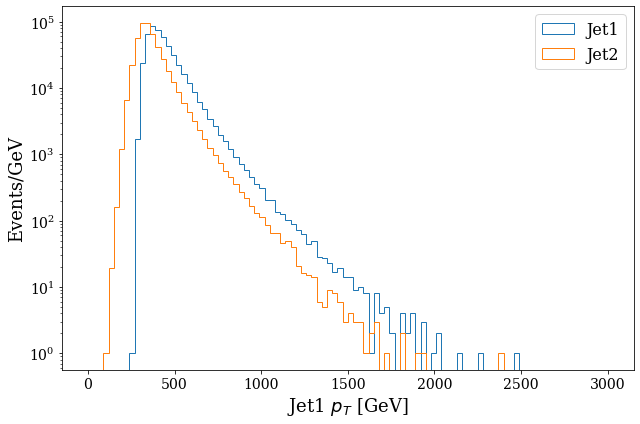

In [8]:
plt.figure(figsize=(9, 6))
plt.hist(data[:,1], range=(0.,3000.), bins=100, histtype='step', label = "Jet1")
plt.hist(data[:,6], range=(0.,3000.), bins=100, histtype='step', label = "Jet2")
plt.semilogy()
plt.xlabel("Jet1 $p_T$ [GeV]")
plt.ylabel("Events/GeV")
plt.legend()
plt.show()

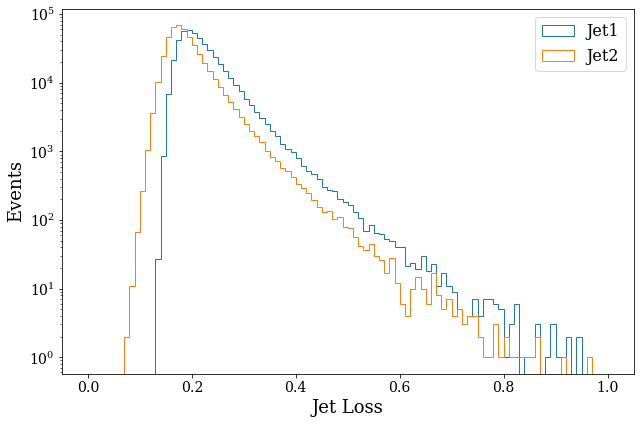

In [9]:
plt.figure(figsize=(9, 6))
plt.hist(data[:,-2], range=rangeloss, bins=100, histtype='step', label = "Jet1")
plt.hist(data[:,-1], range=rangeloss, bins=100, histtype='step', label = "Jet2")
plt.semilogy()
plt.xlabel("Jet Loss")
plt.ylabel("Events")
plt.legend()
plt.show()

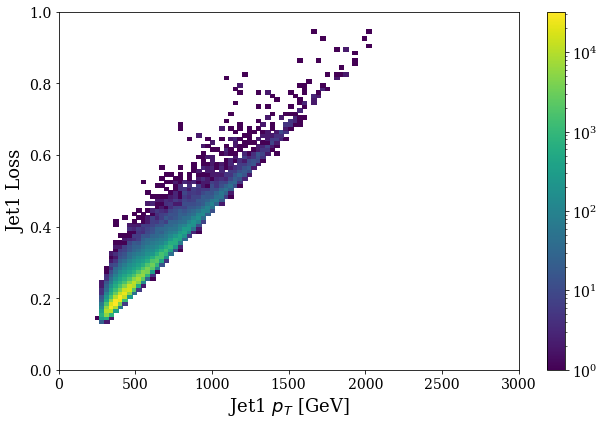

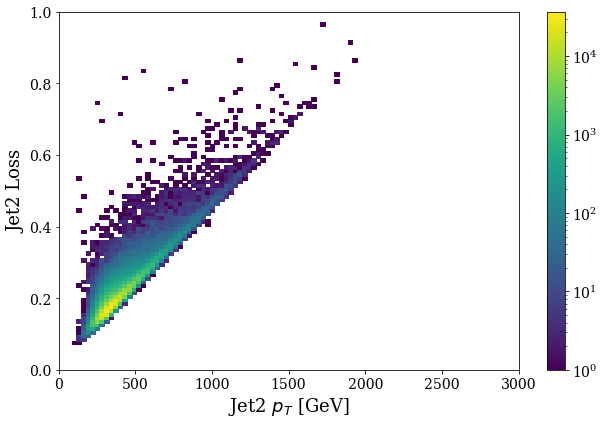

In [10]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,1], data[:,-2],range=((0.,3000.,),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet1 $p_T$ [GeV]")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,6], data[:,-1],range=((0.,3000.,),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet2 Loss")
plt.xlabel("Jet2 $p_T$ [GeV]")
plt.colorbar()
plt.draw()

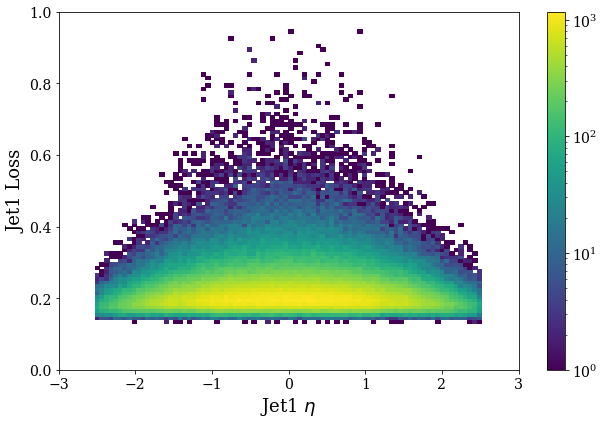

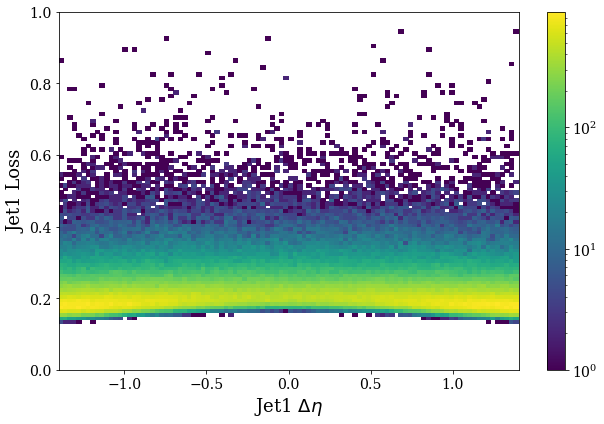

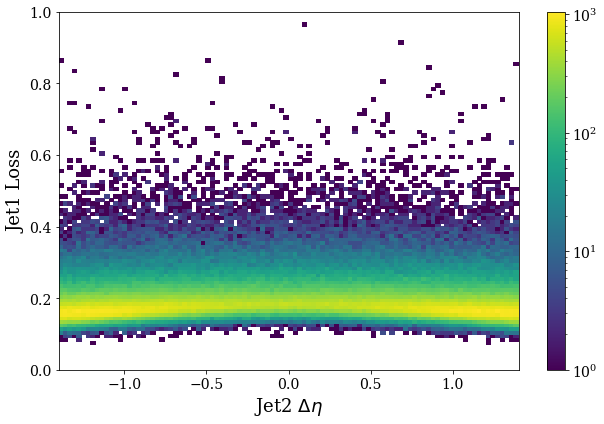

In [18]:
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,2], data[:,-2],range=((-3.,3.),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet1 $\eta$")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,9], data[:,-2],range=((-1.4,1.4),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet1 $\Delta\eta$")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,9], data[:,-1],range=((-1.4,1.4),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet2 $\Delta\eta$")
plt.colorbar()
plt.draw()

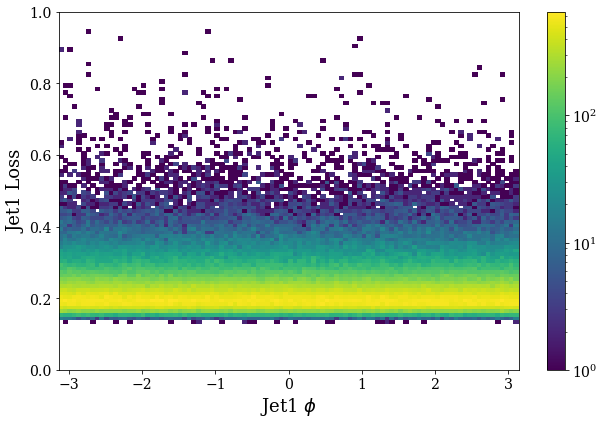

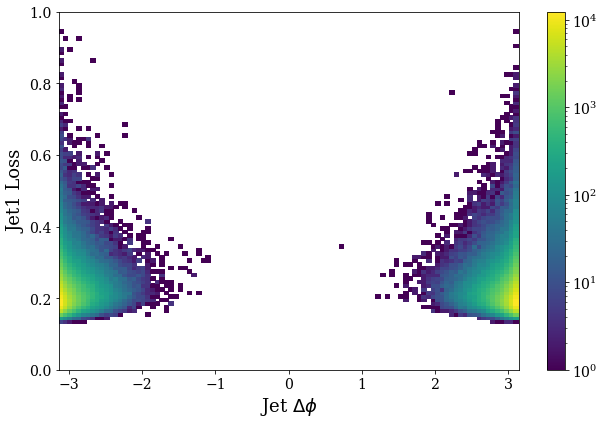

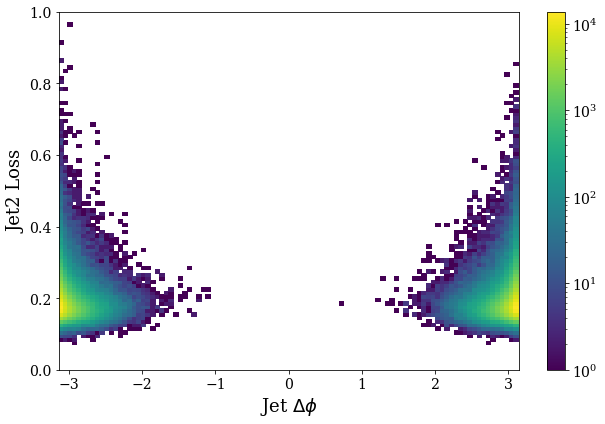

In [19]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,3], data[:,-2],range=((-3.142,3.142),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet1 $\phi$")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,10], data[:,-2],range=((-3.142,3.142),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet $\Delta\phi$")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,10], data[:,-1],range=((-3.142,3.142),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet2 Loss")
plt.xlabel("Jet $\Delta\phi$")
plt.colorbar()
plt.draw()

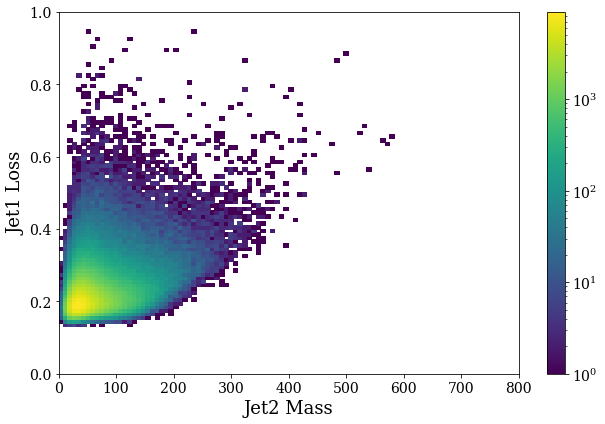

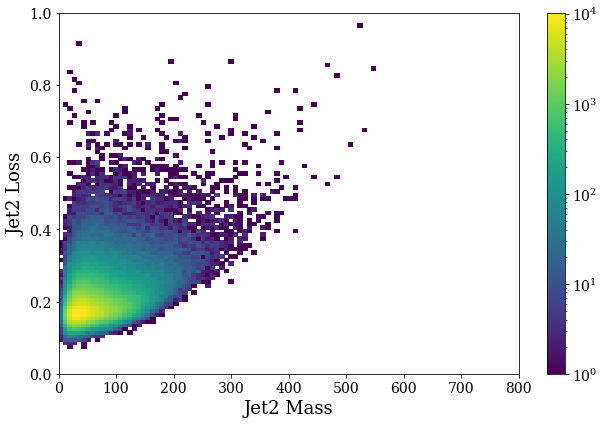

In [20]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,4], data[:,-2],range=((0.,800.),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1 Loss")
plt.xlabel("Jet2 Mass")
plt.colorbar()
plt.draw()
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,7], data[:,-1],range=((0.,800.),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet2 Loss")
plt.xlabel("Jet2 Mass")
plt.colorbar()
plt.draw()

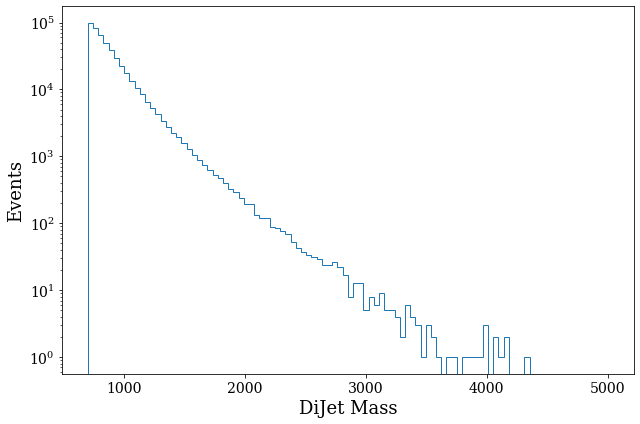

In [21]:
plt.figure(figsize=(9, 6))
plt.hist(data[:,0], range=(700.,5000.), bins=100, histtype='step')
plt.semilogy()
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.show()

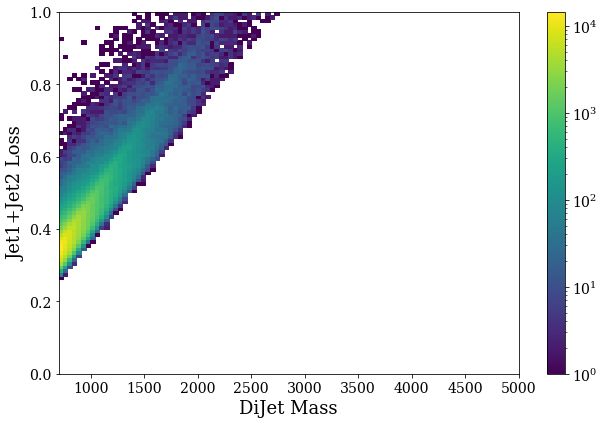

In [22]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(9, 6))
plt.hist2d(data[:,0], data[:,-2]+data[:,-1],range=((700.,5000.),rangeloss), norm=LogNorm(), bins=100)
plt.ylabel("Jet1+Jet2 Loss")
plt.xlabel("DiJet Mass")
plt.colorbar()
plt.draw()

In [24]:
# quantile regression
from sklearn.ensemble import GradientBoostingRegressor
x = np.reshape(data[:,0], (-1,1))
y = data[:,-1]+data[:,-2]
print(x.shape,y.shape)
alpha = 0.99
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(x, y)

(471448, 1) (471448,)


GradientBoostingRegressor(alpha=0.99, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='quantile', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
# separate the sample in iBin bins with comparable statistics
mjjVal = data[:,0]
mjjVal = np.sort(mjjVal)
iBin = 50
binStat = int(len(mjjVal)/iBin)
mjjBins = []
for i in range(iBin+1):
    mjjBins.append(int(mjjVal[i*binStat]))
mjjBins[-1] = max(mjjBins[-1], 5000.)
mjjBinMin = mjjBins[:-1]
mjjBinMax = mjjBins[1:]
print(mjjBinMin)
print(mjjBinMax)
mjjBinCenter = (np.array(mjjBinMin)+np.array(mjjBinMax))/2

[700, 703, 707, 711, 715, 719, 724, 728, 732, 736, 741, 745, 750, 754, 759, 764, 769, 774, 780, 785, 791, 796, 802, 809, 815, 822, 829, 836, 843, 852, 860, 869, 878, 888, 899, 910, 922, 936, 950, 966, 984, 1004, 1026, 1052, 1082, 1119, 1165, 1228, 1318, 1485]
[703, 707, 711, 715, 719, 724, 728, 732, 736, 741, 745, 750, 754, 759, 764, 769, 774, 780, 785, 791, 796, 802, 809, 815, 822, 829, 836, 843, 852, 860, 869, 878, 888, 899, 910, 922, 936, 950, 966, 984, 1004, 1026, 1052, 1082, 1119, 1165, 1228, 1318, 1485, 5000.0]


In [56]:
mJJval = data[:,0]
loss = data[:,-2]+data[:,-1]

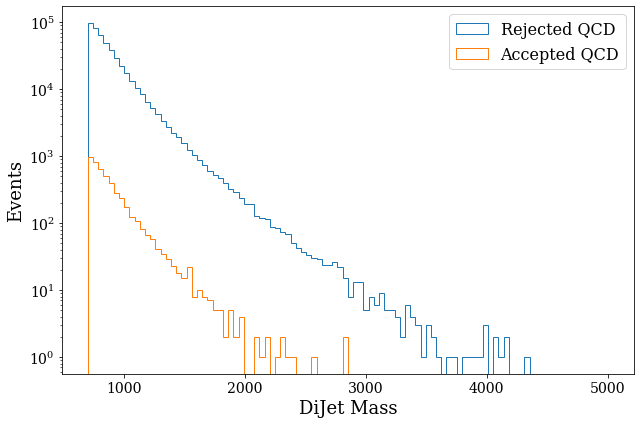

In [57]:
threshold_BDT = clf.predict(np.reshape(mJJval, (-1,1)))
mJJ_QCD_pass_BDT = mJJval[loss>=threshold_BDT]
mJJ_QCD_reject_BDT = mJJval[loss<threshold_BDT]
plt.figure(figsize=(9, 6))
plt.hist(mJJ_QCD_reject_BDT, range=(700.,5000.), bins=100, histtype='step', label="Rejected QCD")
plt.hist(mJJ_QCD_pass_BDT, range=(700.,5000.), bins=100, histtype='step', label="Accepted QCD")
plt.semilogy()
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.legend()
plt.show()

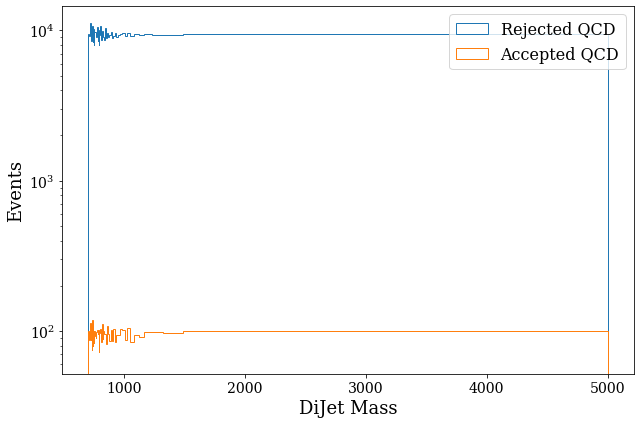

In [58]:
plt.figure(figsize=(9, 6))
hist_reject = plt.hist(mJJ_QCD_reject_BDT, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Rejected QCD")
hist_accept = plt.hist(mJJ_QCD_pass_BDT, range=(700.,5000.), bins=mjjBins, histtype='step', density=False, label="Accepted QCD")
plt.semilogy()
plt.xlabel("DiJet Mass")
plt.ylabel("Events")
plt.legend()
plt.show()

In [59]:
eff = np.array(hist_accept[0])/np.array(hist_reject[0])
err = np.sqrt(eff*(1.-eff)/(hist_accept[0]+hist_reject[0]))

In [60]:
print(eff.shape)

(50,)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


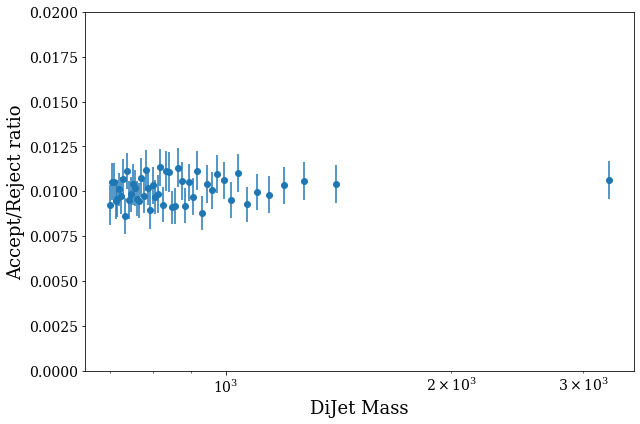

In [62]:
fig, ax = fig, ax = plt.subplots(figsize=(9, 6))
rejected = ax.errorbar(mjjBinCenter, eff, yerr=err, fmt='o')
ax.set_xlabel("DiJet Mass")
ax.set_ylabel("Accept/Reject ratio")
ax.semilogx()
ax.set_ylim((0., 0.02))
fig.show()